In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# Generate one random number from U(0,1)
k_random = np.random.uniform(0, 1)

if k_random > 0.5:
        X = np.random.normal(0, 1, 50)
        Y = np.random.normal(k_random, 1, 50)
else:
        X = np.random.normal(0, 1, 50)
        Y = np.random.normal(0, 1, 50)

In [3]:
# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(X, Y)
print(f"Random k: {k_random}, p-value: {p_value}")

Random k: 0.26905440861709706, p-value: 0.6596476990269753


In [4]:
# Assess the success of the test based on p-value and known truth
if k_random > 0.5 and p_value < 0.05:
        test_outcome = 'Success'
elif k_random <= 0.5 and p_value >= 0.05:
        test_outcome = 'Success'
elif k_random > 0.5 and p_value >= 0.05:
        test_outcome = 'Error II'
else:
        test_outcome = 'Error I'

test_outcome

'Success'

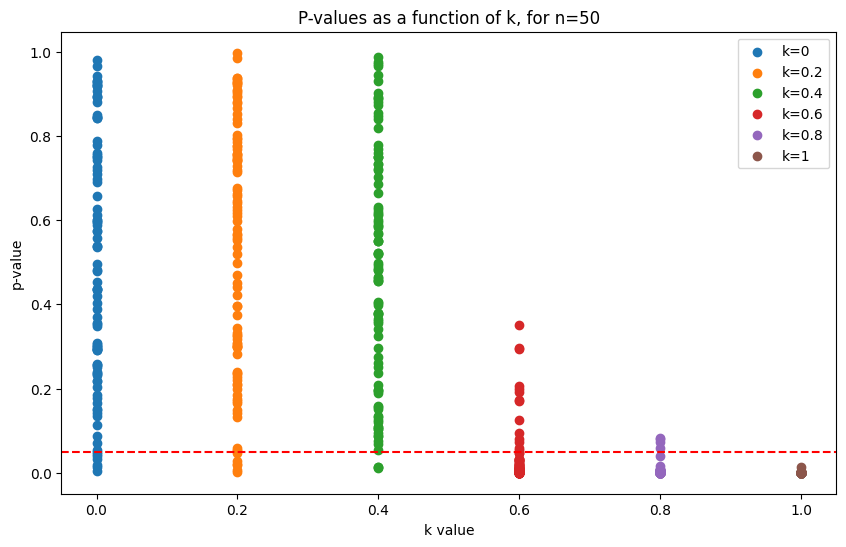

For k<0.5, the test is mostly correct, except a few times where we get an Error I. This is expected, since we are using a 0.05 significance level. By definition, we will be mistaken 5% of the time. Also, note that for k<0.5, the p-values are uniformly distributed across the y axis.
For k>0.5, the test is more correct for higher values of k, since the true distribution of Y is more and more different than X, as k increases. We observe the most cases of Error II for k=0.6.


In [5]:
# Function to perform the operations and test as described
def perform_test(k,n):
    if k > 0.5:
        X = np.random.normal(0, 1, n)
        Y = np.random.normal(k, 1, n)
    else:
        X = np.random.normal(0, 1, n)
        Y = np.random.normal(0, 1, n)

    # Perform two-sample t-test
    t_stat, p_value = stats.ttest_ind(X, Y)

    # Assess the success of the test based on p-value and known truth
    if k > 0.5 and p_value < 0.05:
        test_outcome = 'Success'
    elif k <= 0.5 and p_value >= 0.05:
        test_outcome = 'Success'
    elif k > 0.5 and p_value >= 0.05:
        test_outcome = 'Error II'
    else:
        test_outcome = 'Error I'

    return p_value, test_outcome

# Repeat the process for specified k values
k_values = [0, 0.2, 0.4, 0.6, 0.8, 1]
p_values = []

for k in k_values:
    for _ in range(100):  # Repeat 100 times for each k
        p_value, _ = perform_test(k,50)
        p_values.append((k, p_value))

# Plotting the final figure with all p-values as a function of k
plt.figure(figsize=(10, 6))
for k in k_values:
    ks_p_values = [p for k_val, p in p_values if k_val == k]
    plt.scatter([k]*100, ks_p_values, label=f'k={k}')

plt.axhline(y=0.05, color='r', linestyle='--')

plt.xlabel('k value')
plt.ylabel('p-value')
plt.title('P-values as a function of k, for n=50')
plt.legend()
plt.show()


# Comment
print('For k<0.5, the test is mostly correct, except a few times where we get an Error I. This is expected, since we are using a 0.05 significance level. By definition, we will be mistaken 5% of the time. Also, note that for k<0.5, the p-values are uniformly distributed across the y axis.')
print('For k>0.5, the test is more correct for higher values of k, since the true distribution of Y is more and more different than X, as k increases. We observe the most cases of Error II for k=0.6.')


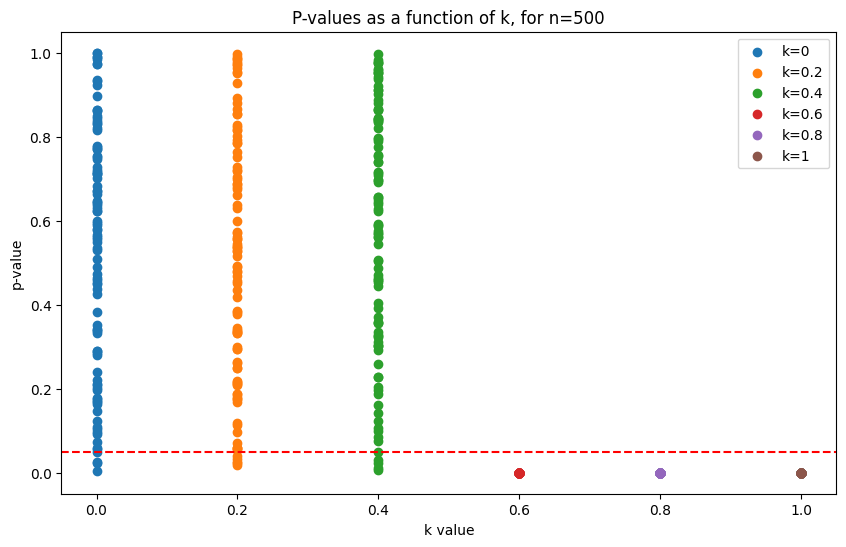

For k<0.5, Error I is still likely. As we said, this is expected, since we are using a 0.05 significance level. By definition we will be mistaken 5% of the time.
For k>0.5, Error II is not likely, even for k=0.6. This is because the sample size is large (n=500), so even a 0.6 difference in the population mean is detectable.


In [6]:
# Repeat the process for specified k values and n=500
k_values = [0, 0.2, 0.4, 0.6, 0.8, 1]
p_values = []

for k in k_values:
    for _ in range(100):  # Repeat 100 times for each k
        p_value, _ = perform_test(k,500)
        p_values.append((k, p_value))

# Plotting the final figure with all p-values as a function of k
plt.figure(figsize=(10, 6))
for k in k_values:
    ks_p_values = [p for k_val, p in p_values if k_val == k]
    plt.scatter([k]*100, ks_p_values, label=f'k={k}')

plt.axhline(y=0.05, color='r', linestyle='--')

plt.xlabel('k value')
plt.ylabel('p-value')
plt.title('P-values as a function of k, for n=500')
plt.legend()
plt.show()

# Comment
print('For k<0.5, Error I is still likely. As we said, this is expected, since we are using a 0.05 significance level. By definition we will be mistaken 5% of the time.')
print('For k>0.5, Error II is not likely, even for k=0.6. This is because the sample size is large (n=500), so even a 0.6 difference in the population mean is detectable.')

